## `scipy.spatial`

### Visual Hull

In [7]:
import numpy as np
print(np.__version__)

import scipy as sp
print(sp.__version__)

%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 8)

1.10.0.dev0+9dba7a4
0.16.0.dev0+bcf5fcd


<img src="files/triceratops.jpg">

<span class="exercise">
Load the `triceratops.obj` file using pandas or numpy.  Note that the file contains two types of data:
vertices and faces.  Try to get both out of the file.
</span>

In [8]:
!head -n5 triceratops.obj

In [9]:
import pandas as pd

df = pd.read_csv('triceratops.obj', sep=' ', names=('ptype', 'x', 'y', 'z'))
df.head()

,ptype,x,y,z
0,v,0.576047,-0.020750,-0.085114
1,v,0.582657,0.018125,-0.095803
2,v,0.611766,0.014097,-0.083653
3,v,0.622981,-0.005351,-0.075573
4,v,0.630173,-0.016425,-0.065138


In [10]:
points = df[df.ptype == 'v']
points = points[['x', 'y', 'z']].values
points

array([[ 0.576047  , -0.0207502 , -0.0851141 ],
       [ 0.582657  ,  0.0181254 , -0.0958034 ],
       [ 0.611766  ,  0.0140973 , -0.0836525 ],
       ..., 
       [ 0.978493  ,  0.0131669 , -0.00660234],
       [ 0.980024  ,  0.00981772, -0.00616342],
       [ 0.981451  ,  0.00729448, -0.00273231]])

In [11]:
face_idx = df[df.ptype == 'f']
face_idx = face_idx[['x', 'y', 'z']].values

faces = face_idx.astype(int) - 1  # zero-based indexing
faces.max(axis=0)

array([2830, 2830, 2831])

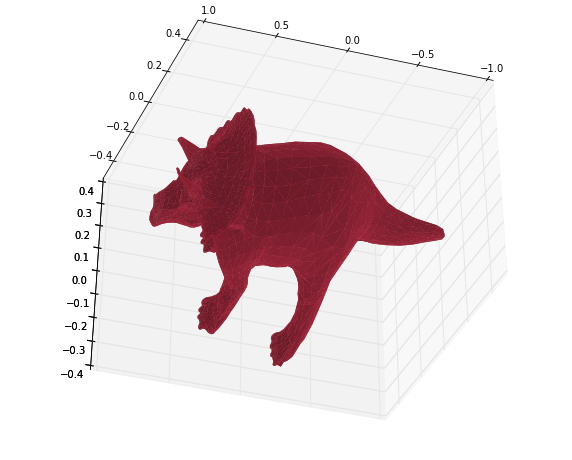

In [12]:
# Enable 3D plots in matplotlib
from mpl_toolkits.mplot3d import Axes3D
    
import numpy as np
import matplotlib.pyplot as plt

x, y, z = points.T

f = plt.figure()
ax = f.add_subplot(1, 1, 1, projection='3d')
ax.view_init(elev=-40, azim=70)

ax.plot_trisurf(x, y, z, triangles=faces, shade=True, color=(0.8, 0.2, 0.3), linewidth=0)

## Or could have plotted data-points only:
# ax.plot3D(x, y, z, '.')

In [16]:
import scipy.spatial as ss

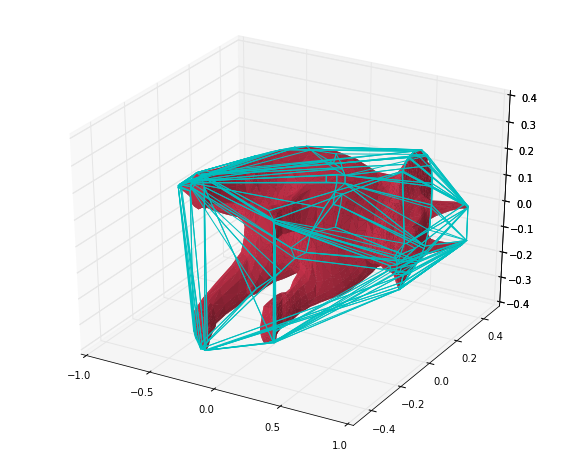

In [19]:
import scipy.spatial as ss

hull = ss.ConvexHull(points)
triangles = hull.points[hull.simplices, :]

f = plt.figure()
ax = f.add_subplot(1, 1, 1, projection='3d')

ax.plot_trisurf(x, y, z, triangles=faces, shade=True, color=(0.8, 0.2, 0.3), linewidth=0)

for t in triangles:
    xx, yy, zz = t.T
    ax.plot(xx, yy, zz, 'c')

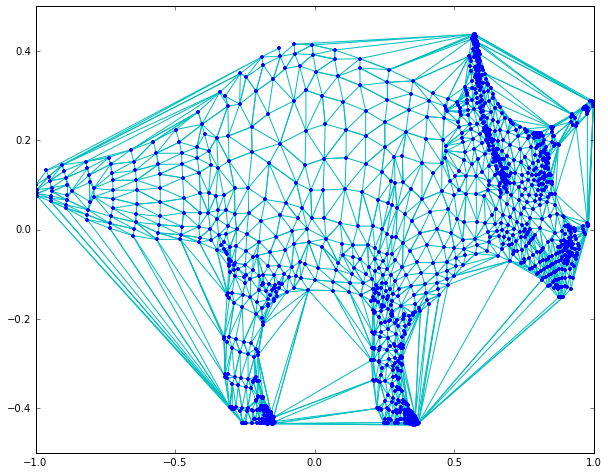

In [22]:
tess = ss.Delaunay(points[..., :2])
elements = tess.points[tess.simplices, :]

f = plt.figure()

for e in elements:
    xx, yy = e.T
    plt.plot(xx, yy, 'c')
    
plt.plot(points[..., 0], points[..., 1], '.')

(-0.43775600000000003, 0.43775600000000003)

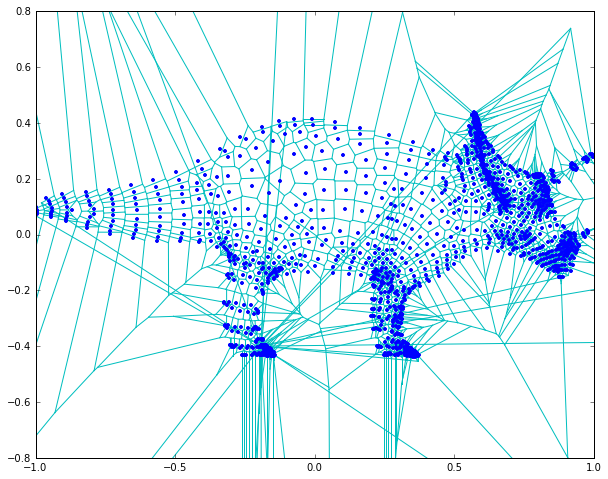

In [34]:
p2d = points[..., :2]

voro = ss.Voronoi(p2d)
ridges = voro.vertices[voro.ridge_vertices, :]

f, ax = plt.subplots()

for r in ridges:
    xx, yy = r.T
    ax.plot(xx, yy, 'c')
    
ax.plot(p2d[:, 0], p2d[:, 1], '.')
ax.axis('equal')
ax.set_xlim(p2d[:, 0].min(), p2d[:, 0].max())
ax.set_ylim(p2d[:, 1].min(), p2d[:, 1].max())

The lines that intersect other cells are nodes at infinity, which we can clean up with a bit more effort.

### KDTree

<img src="kdtree_2d.png" style="float: left;"/><img src="kdtree.png"/>
<div style="clear:both;">
"Kdtree 2d" by Original uploader was KiwiSunset at en.wikipedia. Licensed under CC BY-SA 3.0. 
</div>

<span class="exercise">
**Exercise:** Construct a ``scipy.spatial.KDTree`` object from the point cloud,
and use the ``query_ball_point`` method to isolate the head of the dinosaur.
</span>

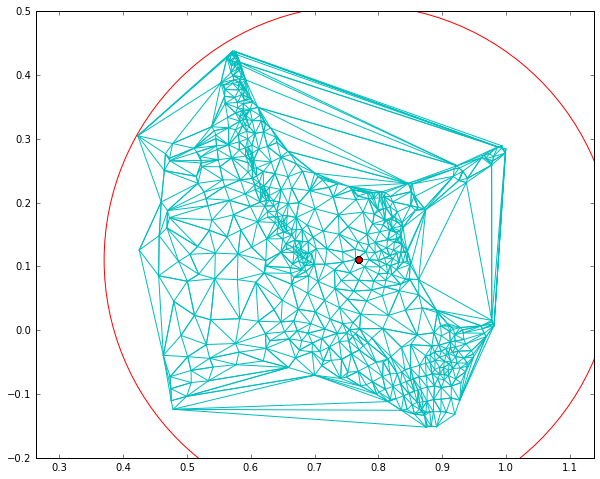

In [42]:
t = ss.KDTree(points)

query_idx = t.query_ball_point((0.77, 0.11, 0), r=0.4)
query_pts = points[query_idx]


# All below just for plotting purposes

f, ax = plt.subplots()

d = ss.Delaunay(query_pts[..., :2])
simplexes = d.points[d.vertices]

for s in simplexes:
    xx, yy = s.T
    ax.plot(xx, yy, 'c')
    ax.plot([0.77], [0.11], 'ro')
    
ax.axis('equal')
ax.add_patch(plt.Circle((0.77, 0.11), radius=0.4, fill=False, linestyle='-', color='r'))